<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def Show_Latex(my_text, size = 40):
    #1 slash if raw string
    #2 slash if standard string
    plt.figure(figsize=(0.1,0.1))
    plt.axis('off')
    plt.text(0, 0.5, my_text, fontsize=size)
    plt.show()

def Grad(vector, variables):
    Grad_Vector =[[None]*len(variables) for i in range(len(vector))]
    for f_index in range(len(vector)):
        f = vector[f_index]
        for var_index in range(len(variables)):
            vari = variables[var_index] 
            q = sp.diff(f, vari)
            Grad_Vector[f_index][var_index] = q
    return Grad_Vector

class GradOfVector():
    def __init__(self, vector, variables):
        '''
        Input
        ----------
        vector: array
        [f1, f2, f3, ...]
        
        variables: array
        Sympy symbols, [x, y, z, ...]        
        '''
        
        self.Grad_Vector = Grad(vector, variables)
        
    def show(self):
        sp.init_printing(use_latex='mathjax')
        show_Matrix = sp.Matrix(self.Grad_Vector)
        return (show_Matrix)
    
    def evaluate(self, my_dict, show_this = False):
        '''
        Input
        --------
        my_dict: dict
        has the substitutions, {x:2, y:1, z:4, ...}
        
        Return
        --------
        The evaluated matrix
        '''
        if show_this is False:
            return np.array(sp.Matrix(self.Grad_Vector).evalf(subs = my_dict), dtype=np.float64)
        if show_this:
            return sp.Matrix(self.Grad_Vector).evalf(subs = my_dict)


    
    

In [3]:
def n_body_system(t, *QP):
    # With McGee
    # Only works when energy is 0
    dim = 4
    n = 1
    E = 0
    Z = sp.symbols('Z')

    Q = np.array(QP[:n])[0]
    P = np.array(QP[n:])[0]
    dot_Q = np.zeros([n, dim], dtype = object)
    dot_P = np.zeros([n, dim], dtype = object)

    Q1 = Q[0]
    Q2 = Q[1]
    Q3 = Q[2]
    Q4 = Q[3]

    P1 = P[0]
    P2 = P[1]
    P3 = P[2]
    P4 = P[3]

    r1 = Q1**2 + Q2**2
    r2 = Q3**2 + Q4**2

    r12 = (r1**2 + r2**2 - 2*(Q1*Q3 + Q2*Q4)**2 + 2*(Q1*Q4-Q2*Q3)**2)**0.5

    #R = (r1**2 + r2**2)**0.5
    #E = R*E

    pr_bar = 1/2 * (Q1*P1 + Q2*P2 + Q3*P3 + Q4*P4)

    temp1 = 1/4 * Q1 * (P3**2 + P4**2) - 2*Z*Q1 + 2*Q1*r2*(-E + 1/r12)
    temp2 = 2*((r1*r2)/(r12**3))*(r1*Q1 + (Q4**2-Q3**2)*Q1 - 2*Q2*Q3*Q4)
    dot_P[0][0] = -(temp1 - temp2)

    temp1 = 1/4 * Q2 * (P3**2 + P4**2) - 2*Z*Q2 + 2*Q2*r2*(-E + 1/r12)
    temp2 = 2*((r1*r2)/(r12**3))*(r1*Q2 - (Q4**2-Q3**2)*Q2 - 2*Q1*Q3*Q4)
    dot_P[0][1] = -(temp1 - temp2)

    temp1 = 1/4 * Q3*(P1**2 + P2**2) - 2*Z*Q3 + 2*Q3*r1*(-E + 1/r12)
    temp2 = 2*((r1*r2)/(r12**3))*(r2*Q3 + (Q2**2 - Q1**2)*Q3 - 2*Q1*Q2*Q4)
    dot_P[0][2] = -(temp1 - temp2)

    temp1 = 1/4 * Q4*(P1**2 + P2**2) - 2*Z*Q4 + 2*Q4*r1*(-E + 1/r12)
    temp2 = 2*((r1*r2)/(r12**3))*(r2*Q4 - (Q2**2 - Q1**2)*Q4 - 2*Q1*Q2*Q3)
    dot_P[0][3] = -(temp1 - temp2)


    dot_Q[0][0] = ((1/4)*r2*P1 - (1/2)*Q1*r1*r2*pr_bar)
    dot_Q[0][1] = ((1/4)*r2*P2 - (1/2)*Q2*r1*r2*pr_bar)
    dot_Q[0][2] = ((1/4)*r1*P3 - (1/2)*Q3*r1*r2*pr_bar)
    dot_Q[0][3] = ((1/4)*r1*P4 - (1/2)*Q4*r1*r2*pr_bar)

    return np.array([*dot_Q, *dot_P])

In [4]:
q1,q2, q3,q4, p1,p2,p3,p4 = sp.symbols('q_1 q_2 q_3 q_4 p_1 p_2 p_3 p_4')
Q = np.array([q1, q2, q3, q4])
P = np.array([p1, p2, p3, p4])

In [5]:
#Show ODE System
my_sys = n_body_system(0, Q, P)
ODEs = [my_sys[0][0], my_sys[0][1], my_sys[0][2], my_sys[0][3], my_sys[1][0], my_sys[1][1], my_sys[1][2], my_sys[1][3]]
sp.Matrix(ODEs)

Matrix([
[                                                                                                                                                                                                                                                           p_1*(0.25*q_3**2 + 0.25*q_4**2) - 0.5*q_1*(q_1**2 + q_2**2)*(q_3**2 + q_4**2)*(0.5*p_1*q_1 + 0.5*p_2*q_2 + 0.5*p_3*q_3 + 0.5*p_4*q_4)],
[                                                                                                                                                                                                                                                           p_2*(0.25*q_3**2 + 0.25*q_4**2) - 0.5*q_2*(q_1**2 + q_2**2)*(q_3**2 + q_4**2)*(0.5*p_1*q_1 + 0.5*p_2*q_2 + 0.5*p_3*q_3 + 0.5*p_4*q_4)],
[                                                                                                                                                                                                                      

In [6]:
#Calculate Lin
a = GradOfVector(ODEs, [q1,q2, q3,q4, p1,p2,p3,p4])
a.show()

⎡                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

In [7]:
#TCP
Z = sp.symbols('Z')
TCP_dict = {q1:0,q2:0.84089642, q3:0.84089642,q4:0, p1:0,p2:-3.74165739,p3:-3.74165739,p4:0, Z:2}
TCP_Lin = a.evaluate(TCP_dict, show_this = False)
sp.Matrix(TCP_Lin)

⎡ 0.78658659378836          0.0                0.0                0.0         
⎢                                                                             
⎢       0.0          2.75305307825926   0.393293332412128         0.0         
⎢                                                                             
⎢       0.0          0.393293332412128  2.75305307825926          0.0         
⎢                                                                             
⎢       0.0                 0.0                0.0          0.78658659378836  
⎢                                                                             
⎢-0.500000006035403         0.0                0.0                -0.5        
⎢                                                                             
⎢       0.0          0.999999993964597        -1.0                0.0         
⎢                                                                             
⎢       0.0                -1.0         0.9999999939

In [8]:
#TCP Eigen value/vectors
TCPeigenvals, TCPeigenvectors = np.linalg.eig(TCP_Lin)

In [9]:
TCPeigenvals

array([ 7.86586592e-01+0.j        ,  3.93293297e-01+0.14865087j,
        3.93293297e-01-0.14865087j,  1.35639040e-09+0.j        ,
       -1.66110289e+00+0.j        ,  3.14634641e+00+0.j        ,
        2.44768948e+00+0.j        ,  1.57317315e+00+0.j        ])

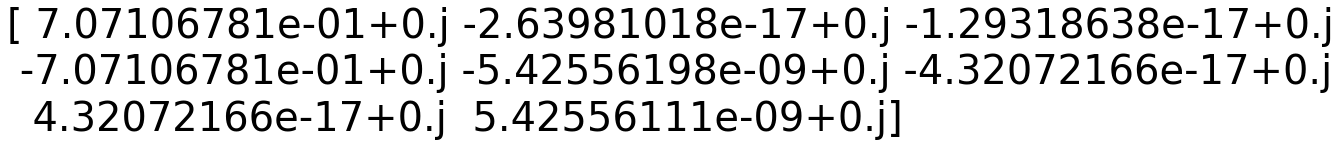

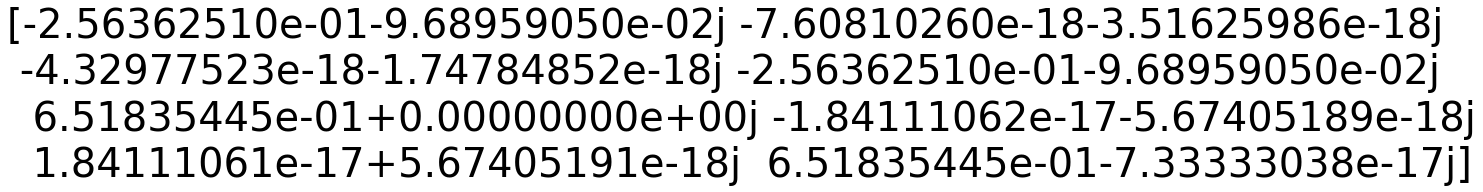

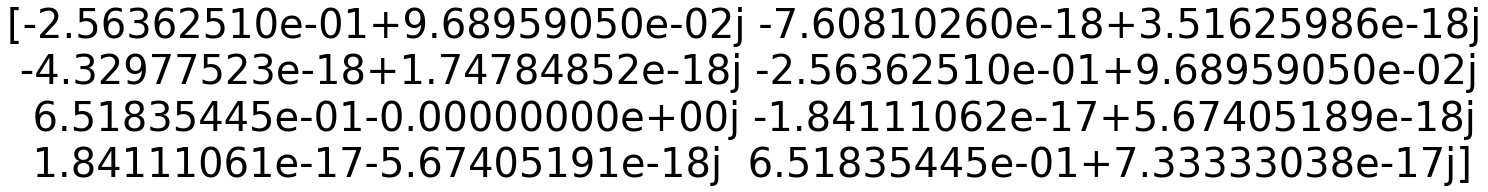

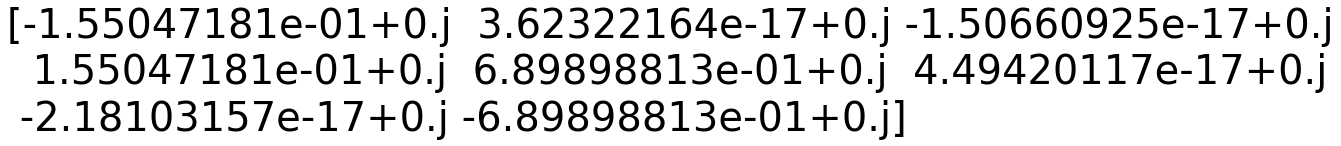

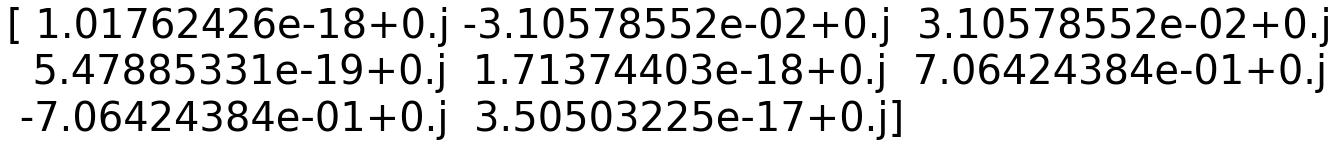

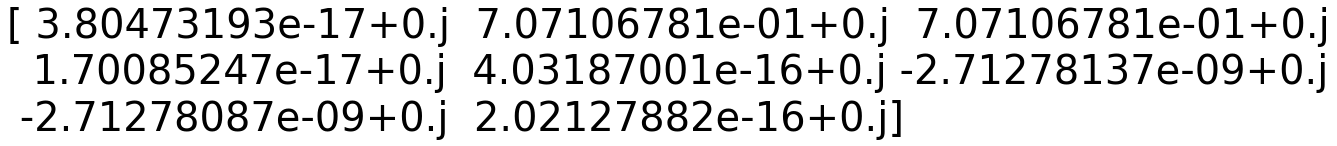

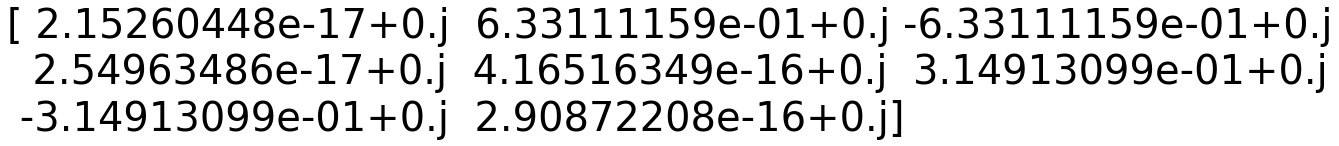

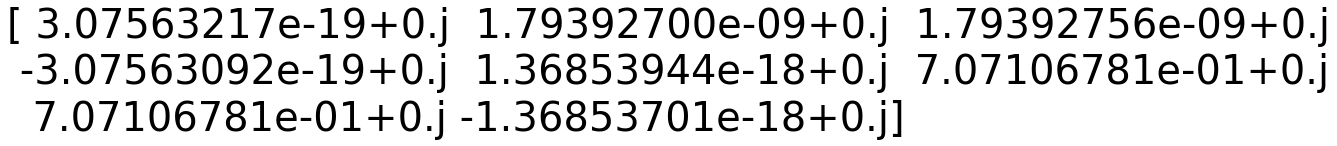

In [10]:
for i in range(len(TCPeigenvals)):
    Show_Latex(sp.latex(TCPeigenvectors[:,i]))

In [11]:
#DEP
Z = sp.symbols('Z')
DEP_dict = {q1:0,q2:0.84089642, q3:0.84089642,q4:0, p1:0,p2:3.74165739,p3:3.74165739,p4:0, Z:2}
DEP_Lin = a.evaluate(DEP_dict, show_this = False)
sp.Matrix(DEP_Lin)

⎡-0.78658659378836          0.0                 0.0                 0.0       
⎢                                                                             
⎢       0.0          -2.75305307825926   -0.393293332412128         0.0       
⎢                                                                             
⎢       0.0          -0.393293332412128  -2.75305307825926          0.0       
⎢                                                                             
⎢       0.0                 0.0                 0.0          -0.78658659378836
⎢                                                                             
⎢-0.500000006035403         0.0                 0.0                 -0.5      
⎢                                                                             
⎢       0.0          0.999999993964597          -1.0                0.0       
⎢                                                                             
⎢       0.0                 -1.0         0.999999993

In [12]:
#DEP Eigen value/vectors
DEPeigenvals, DEPeigenvectors = np.linalg.eig(DEP_Lin)

In [13]:
DEPeigenvals

array([-7.86586592e-01+0.j        , -3.93293297e-01+0.14865087j,
       -3.93293297e-01-0.14865087j, -1.35639040e-09+0.j        ,
        1.66110289e+00+0.j        , -3.14634641e+00+0.j        ,
       -2.44768948e+00+0.j        , -1.57317315e+00+0.j        ])

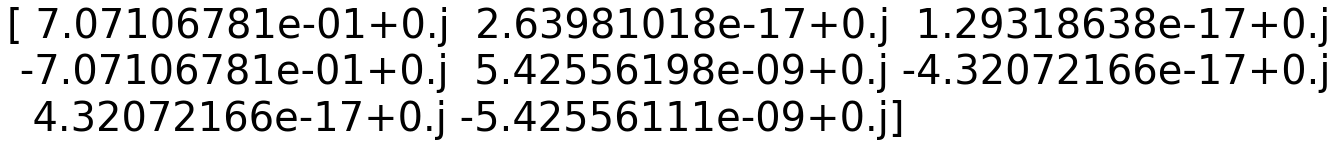

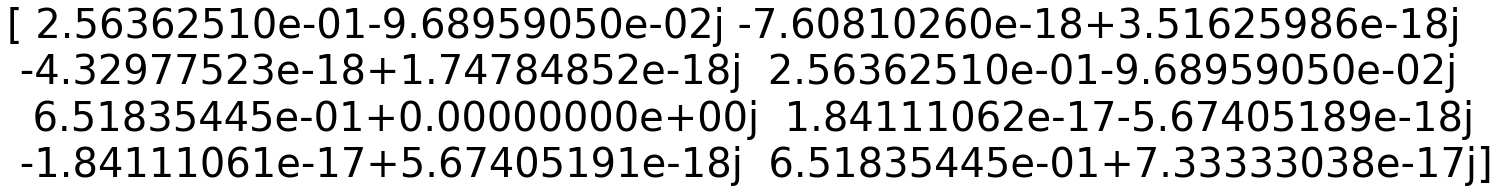

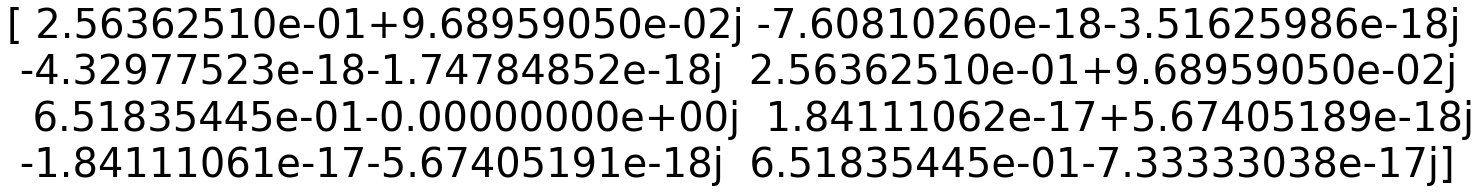

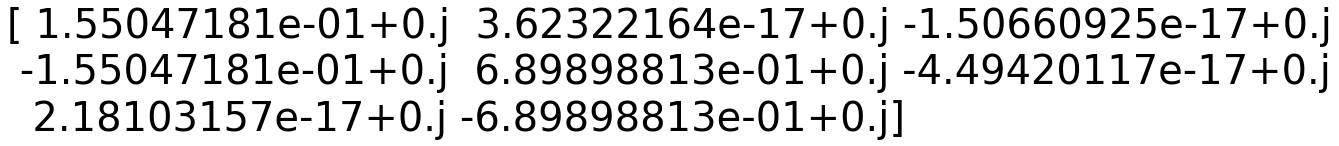

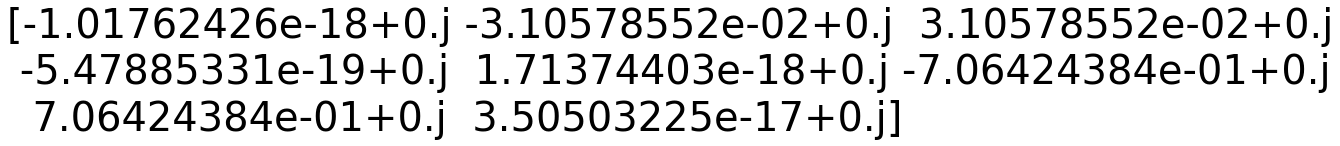

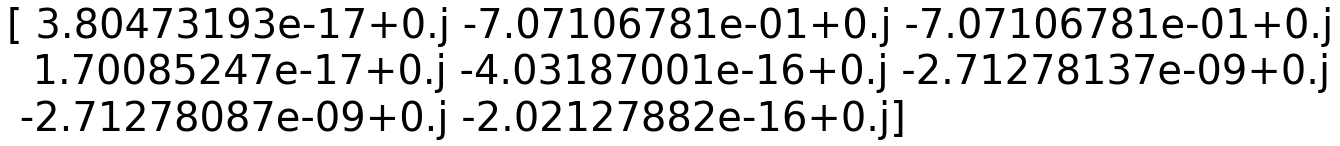

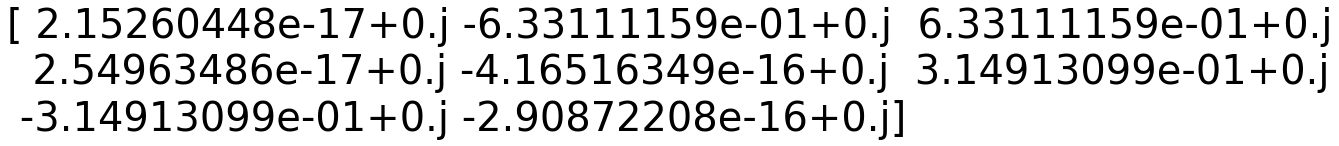

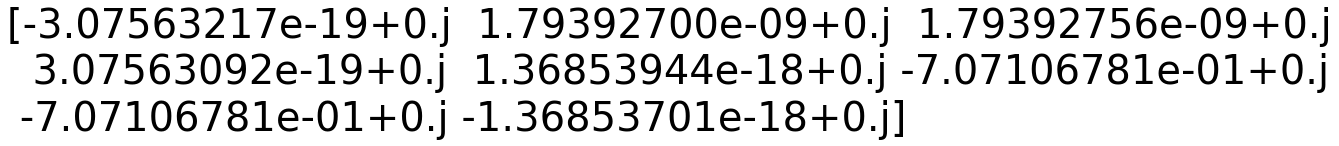

In [14]:
for i in range(len(DEPeigenvals)):
    Show_Latex(sp.latex(DEPeigenvectors[:,i]))